In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pdid = pd.read_csv(open('a.csv'))

In [3]:
pdid.head()

,acq_date,latitude,longitude,brightness,scan,track,confidence,bright_t31,frp
0,2019/10/1,-17.008271,134.182112,339.646875,1.712835,1.234933,75.063616,309.350893,78.410938
1,2019/10/2,-16.952363,135.828897,335.227820,2.022306,1.340852,69.839599,308.792481,81.694737
2,2019/10/3,-16.784131,133.871913,336.896229,1.646554,1.220936,74.425228,308.222497,74.312094
3,2019/10/4,-20.262109,134.677029,334.029026,1.784615,1.260821,74.240000,304.734359,71.220205
4,2019/10/5,-20.761703,132.477100,338.258416,1.723927,1.241419,75.526403,307.247690,94.362376


In [4]:
Y = pdid['frp']

In [6]:
X = pdid[['latitude','longitude','brightness','scan','track','confidence','bright_t31']]
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
X = pd.DataFrame(data = principalComponents, columns = ['1'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
ss_x = StandardScaler()
x_train = ss_x.fit_transform(x_train)
x_test = ss_x.transform(x_test)

ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = ss_y.transform(y_test.values.reshape(-1, 1))
rfr = RandomForestRegressor()
# 训练
rfr.fit(x_train, y_train)
# 预测 保存预测结果
rfr_y_predict = rfr.predict(x_test)
# 极端随机森林回归
etr = ExtraTreesRegressor()
# 训练
etr.fit(x_train, y_train)
# 预测 保存预测结果
etr_y_predict = rfr.predict(x_test)
# 梯度提升回归
gbr = GradientBoostingRegressor()
# 训练
gbr.fit(x_train, y_train)
# 预测 保存预测结果
gbr_y_predict = rfr.predict(x_test)

print("随机森林回归的默认评估值为：", rfr.score(x_test, y_test))
print("随机森林回归的R_squared值为：", r2_score(y_test, rfr_y_predict))
print("随机森林回归的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rfr_y_predict)))
print("随机森林回归的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rfr_y_predict)))
# 极端随机森林回归模型评估
print("极端随机森林回归的默认评估值为：", etr.score(x_test, y_test))
print("极端随机森林回归的R_squared值为：", r2_score(y_test, gbr_y_predict))
print("极端随机森林回归的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(gbr_y_predict)))
print("极端随机森林回归的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(gbr_y_predict)))
 # 梯度提升回归模型评估
print("梯度提升回归回归的默认评估值为：", gbr.score(x_test, y_test))
print("梯度提升回归回归的R_squared值为：", r2_score(y_test, etr_y_predict))
print("梯度提升回归回归的均方误差为:", mean_squared_error(ss_y.inverse_transform(y_test), ss_y.inverse_transform(etr_y_predict)))
print("梯度提升回归回归的平均绝对误差为:", mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(etr_y_predict)))


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


随机森林回归的默认评估值为： -4.698725517698453
随机森林回归的R_squared值为： -4.698725517698453
随机森林回归的均方误差为: 3153.283108555207
随机森林回归的平均绝对误差为: 26.04050064402692
极端随机森林回归的默认评估值为： -4.074565904027095
极端随机森林回归的R_squared值为： -4.698725517698453
极端随机森林回归的均方误差为: 3153.283108555207
极端随机森林回归的平均绝对误差为: 26.04050064402692
梯度提升回归回归的默认评估值为： -12.473328735922834
梯度提升回归回归的R_squared值为： -4.698725517698453
梯度提升回归回归的均方误差为: 3153.283108555207
梯度提升回归回归的平均绝对误差为: 26.04050064402692


In [8]:
def try_different_method(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

随机森林回归的均方误差为: 1.8770524121226884
随机森林回归的平均绝对误差为: 0.5606424829919828
极端森林回归的均方误差为: 0.24214661625170614
极端森林回归的平均绝对误差为: 0.38850478387503085


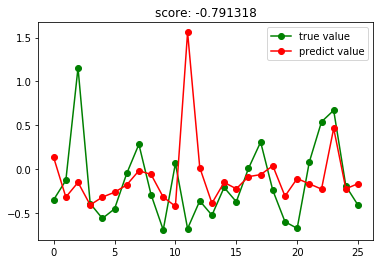

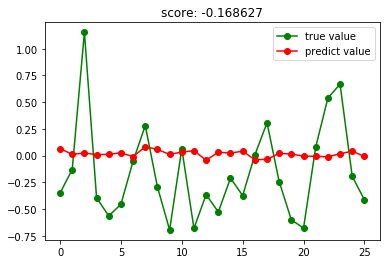

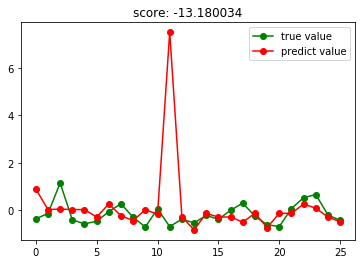

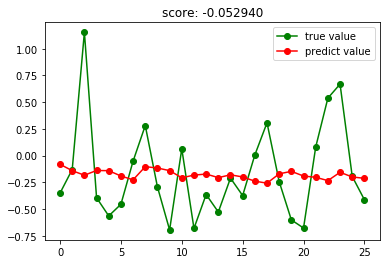

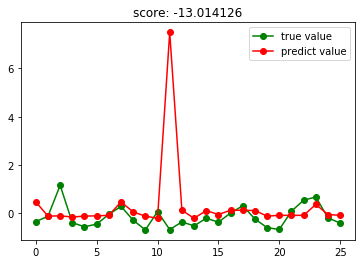

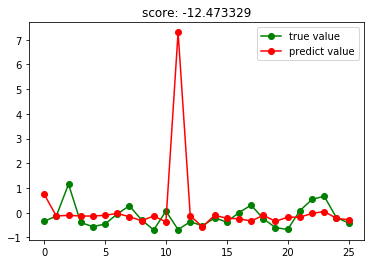

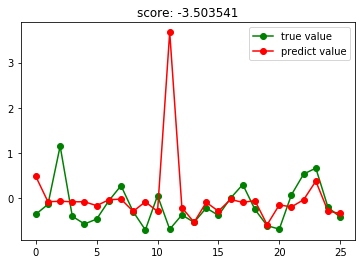

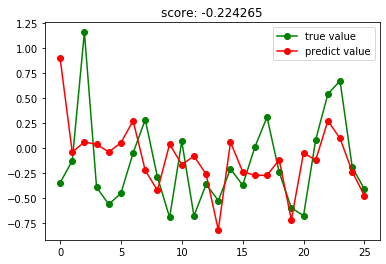

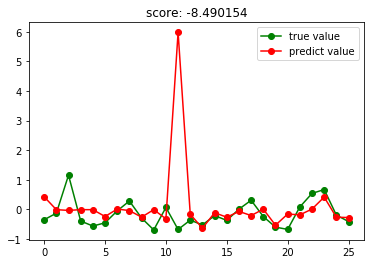

In [9]:
###########3.具体方法选择##########
####3.1决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()
####3.2线性回归####
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()
####3.3SVM回归####
from sklearn import svm
model_SVR = svm.SVR()
####3.4KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()
####3.5随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树
####3.6Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树
####3.7GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树
####3.8Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()
####3.9ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()
###########4.具体方法调用部分##########

try_different_method(model_KNeighborsRegressor)

try_different_method(model_LinearRegression)

try_different_method(model_DecisionTreeRegressor)

try_different_method(model_SVR)

try_different_method(model_AdaBoostRegressor)

try_different_method(model_GradientBoostingRegressor)

try_different_method(model_BaggingRegressor)

try_different_method(model_ExtraTreeRegressor)

try_different_method(model_RandomForestRegressor)

print("随机森林回归的均方误差为:", mean_squared_error(y_test, model_RandomForestRegressor.predict(x_test)))
print("随机森林回归的平均绝对误差为:", mean_absolute_error(y_test, model_RandomForestRegressor.predict(x_test)))
print("极端森林回归的均方误差为:", mean_squared_error(y_test, model_ExtraTreeRegressor.predict(x_test)))
print("极端森林回归的平均绝对误差为:", mean_absolute_error(y_test,model_ExtraTreeRegressor.predict(x_test)))